# Decison Trees

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("PastHires.csv")

In [3]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 856.0+ bytes


In [5]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


## Converting Categorical data into Numerical data

In [6]:
employee_dict = {
    'N': 0,
    'Y': 1
}

In [7]:
data['Employed?'] = data['Employed?'].map(employee_dict)

In [8]:
data['Employed?'].head()

0    1
1    0
2    0
3    1
4    0
Name: Employed?, dtype: int64

### View data for all the categorical data

In [9]:
import numpy as np

In [10]:
data.describe(include=[np.object])

,Level of Education,Top-tier school,Interned,Hired
count,13,13,13,13
unique,3,2,2,2
top,BS,N,N,Y
freq,7,7,8,9


In [11]:
data['Level of Education'].unique()

array(['BS', 'MS', 'PhD'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
education_encoder = LabelEncoder()

In [15]:
education_level = data['Level of Education']

In [16]:
education_level.head()

0     BS
1     BS
2     BS
3     MS
4    PhD
Name: Level of Education, dtype: object

In [17]:
data['Level of Education'] = education_encoder.fit_transform(data['Level of Education'])

In [21]:
data['Level of Education']

0     0
1     0
2     0
3     1
4     2
5     2
6     1
7     0
8     0
9     0
10    2
11    0
12    2
Name: Level of Education, dtype: int32

In [24]:
education_encoder.inverse_transform(data['Level of Education'])

array(['BS', 'BS', 'BS', 'MS', 'PhD', 'PhD', 'MS', 'BS', 'BS', 'BS',
       'PhD', 'BS', 'PhD'], dtype=object)

In [25]:
data['Top-tier school'] = data['Top-tier school'].map(employee_dict)
data['Interned'] = data['Interned'].map(employee_dict)
data['Hired'] = data['Hired'].map(employee_dict)

In [26]:
data['Level of Education'].unique()

array([0, 1, 2])

In [27]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [28]:
data.describe()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,5.153846,0.384615,1.769231,0.769231,0.461538,0.384615,0.692308
std,6.348834,0.506370,2.006400,0.926809,0.518875,0.506370,0.480384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,20.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000


### Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [29]:
data.shape

(13, 7)

In [30]:
data.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [31]:
features = list(data.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

### Import Scikit-Learn library and perform Machine Learning

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
decision_tree_model = DecisionTreeClassifier()

In [35]:
X = data[features]
X.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0


In [36]:
Y = data['Hired']
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: Hired, dtype: int64

In [37]:
decision_tree_model.fit(X, Y)

DecisionTreeClassifier()

In [38]:
X.head(1)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0


In [39]:
prediction = decision_tree_model.predict([[4, 1, 2, 0, 0, 1]])
prediction

array([1], dtype=int64)

### Visualize the Decision Tree structure

In [40]:
from sklearn import tree

### Link for GraphViz file 

[https://graphviz.gitlab.io/_pages/Download/Download_windows.html]

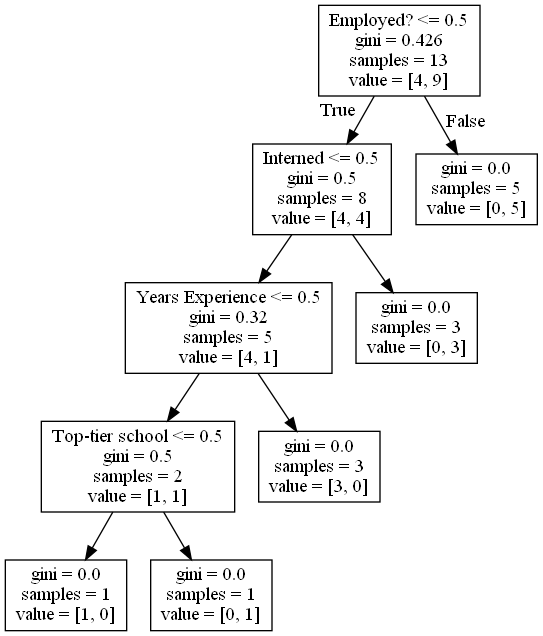

In [32]:
from IPython.display import Image  
# from sklearn.externals.six import StringIO  
from six import StringIO
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(decision_tree_model, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png("Hiring-Decision.png")
Image(graph.create_png())  